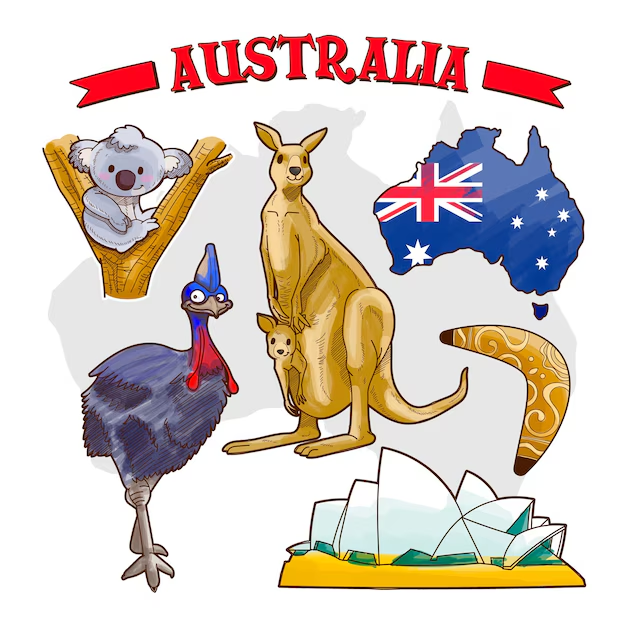

# Caso Fundamentos de Minería de datos

# Fase 1: Business Understanding

## **Contexto**

A continuación, nos encontraremos con un data set de observaciones meteorológicas de múltiples ubicaciones en Australia, obtenidas de la Oficina de Meteorología de la Commonwealth de Australia, en la cual trabajaremos para esta ocasión solo tres fases (Business Understanding, Data Understanding, Data Preparation), para tener un mejor entendimiento de este data set, daremos como contexto las características principales de este país.

Australia es el país Oceánico más seco y llano del mundo, con una meseta árida en su mitad occidental y climas variados en el resto del territorio. La Gran Cordillera Divisoria es su principal formación montañosa de más de 3.500 km de largo, y los ríos Murray y Darling son los más caudalosos.

Se divide en seis estados, dos territorios continentales y cuenta con importantes ciudades como Sídney, Melbourne, Brisbane, Perth y Adelaide. La población asciende a más de 25 millones de habitantes en su mayoría se concentra en áreas urbanas.

Australia presenta una gran diversidad climática que abarca desde zonas desérticas hasta climas templados y tropicales. El clima predominante es el desértico y semiárido, especialmente en la mitad occidental del país, donde se estima que un 40% del territorio está cubierto por dunas de arena. El norte de Australia tiene un clima tropical, mientras que las zonas más fértiles y con un clima templado con cuatro estaciones se encuentran en el sureste y suroeste del país. Las temperaturas medias oscilan entre los 27°C en el norte y los 13°C en el sur, con máximas alcanzando los 38°C en el centro.


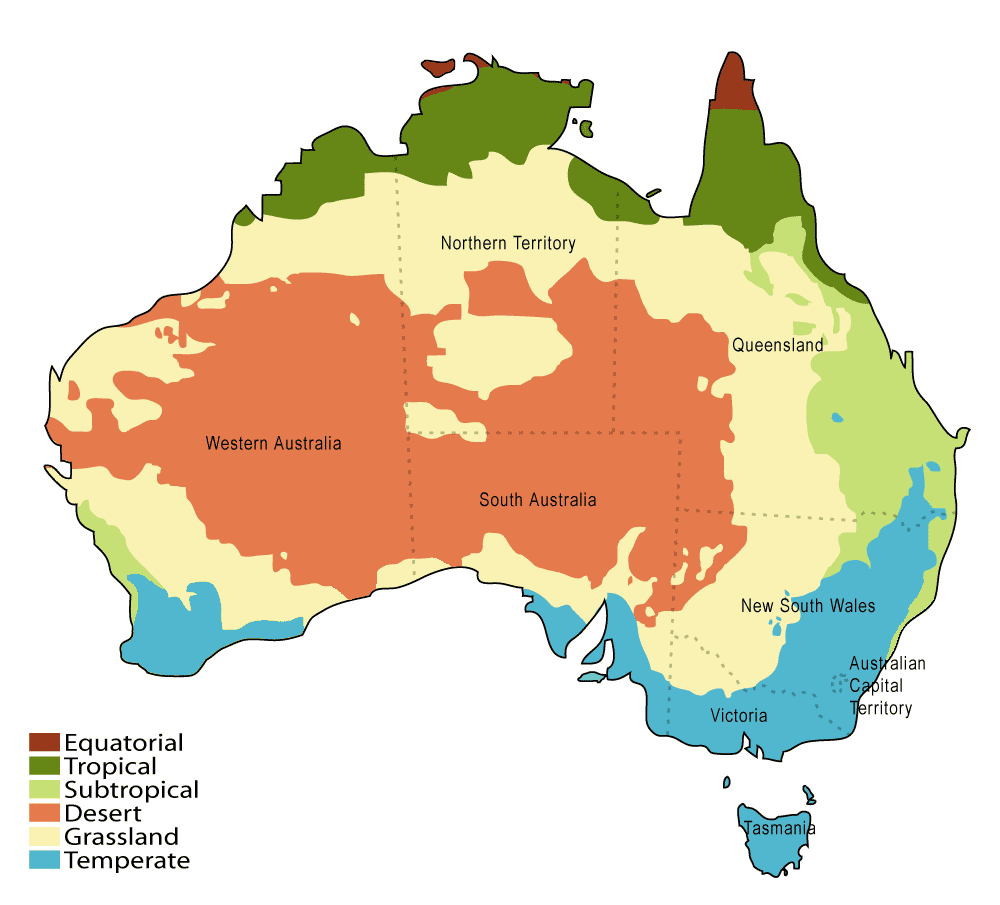

##**Definiendo Objetivo**

**Variables objetivo:**
- RainTomorrow(si hay lluvia al día siguiente - No / Sí) y una variable de riesgo RISK_MM(cuánta lluvia registrada en milímetros)

# Fase 2: Data Understanding

##Primero realizaremos una importación de librerías que utilizaremos dentro del caso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Se realizará una importación de distintas librerias las cuales usaremos para realizar el caso semestral y el analisis a profundidad del data frame:

### **Pandas:** Panda es una libreria de python especializada en el analisis de datos, la cual nos servirá para la realización de dataframes y la lectura y utilización de csv los cuales utilizaremos en el caso a estudiar
### **Numpy**:Numpy es una librería de pyhton la cual tiene como funcionalidad de ayudarnos a realizar arrays junto con sus funciones matematicas las cuales utilizaremos junto con la librería de pandas para un mejor desarrollo del caso

### **Matplotlib.pyplot**: Matplotlib es una librería la cual nos servirá para la visualización graficas de manera bidimensional para visualizar de buena manera el comportamiento que puedan tener los graficos

### **Seaborn**: Seaborn es una librería la cual principalmente nos enfocaremos en la realización de visualizaciones de grafico de calor para determinar de manera explicita cuales son las variables las cuales tendrán mayor correlación entre sí


## Luego realizamos la importación de la base de datos a estudiar

In [2]:

df = pd.read_csv( '/content/weatherAUS.csv', sep="," )

### A simple vista podemos ver que el dataframe está cargado, y se pueden apreciar algunos datos faltantes en columnas por lo que verificaremos tanto su cantidad de observaciones y caracteristicas

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### Tenemos como resultado que contienen 142193 observaciones y 24 Caracteristicas

## Luego de saber la cantidad de datos que tiene el dataset pasaremos a ver de que tipos de datos se compone el data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### Nos da como resultado la existencia de un total de:
####**17 tipo de datos numericos:**
MinTemp : Esta caracteristica tiene como función mostrar en grados celsius la temperatura minima según la observación

MaxTemp: Esta caracteristica tiene como función mostrar en grados celsius la temperatura maxima según la observación

Rainfall: Esta caracteristica muestra la cantidad lluvia registrada durante ese dia de observación

Evaporation: muestra la cantidad de evaporación en mm en 24 horas de observación

Sunshine: Muestra horas de sol brillante durante el dia

WindGustSpeed: es la velocidad en KM/HR de la rafaga de viento mas fuerte en 24 horas

WindSpeed9am: velocidad del viento a las 9 am

WindSpeed3am: velocidad del viento a las 3 pm

Humidity9am: Porcentaje de humedad a las 9 am

Humidity3am: Porcentaje de humedad a las 3 pm

Pressure9am: Presión atmosferica a las 9 am

Pressure3am: Presión atmosferica a las 3 pm

Cloud9am: Para esta variable se realiza la medición del cielo cubierto a las  9 am utilizando "octavos" los cuales son escalas de 0 al 8 según la intensidad de nubosidad del cielo

Cloud3am: de igual manera que Cloud9am se realiza del mismo modo, la diferencia es que es a las 3am

Temp9am: Temperatura registrada de la observación a las 9 am

Temp3am: Temperatura registrada de la observación a las 3 am

RISK_MM: hace referencia a la cantidad de lluvia en porcentaje que puedan significar peligro.

####**7 tipo de datos categoricos:**

Date: Hace referencia de la fecha donde fue realizada la observación

Location: Es la ubicación donde se realizó la observación en las estaciones metereologicas

WindGustDir: Hace referencia de la dirección donde fue registrado el viento mas fuerte en las 24 horas

WindDir9am: Muestra la dirección solamente de donde era el viento a las 9am

WindDir3pm: Muestra la dirección solamente de donde era el viento a las 3pm

RainToday: Variable que indica si la precipitación registrada fue mayor a 1mm con Valor 1 si fue así o bien 0 si no fue

RainTomorrow:  Variable que indica si al dia siguiente llovió o no tomando 1 como si fue así o bien 0  si no

## **Entendiendo Valores nulos**

In [5]:
for cantidad in df.columns:
  print('Total de valores nulos de', cantidad, '=', df[cantidad].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

In [6]:
for cantidad in df.columns:
    total_nulos = df[cantidad].isna().sum()
    total_datos = len(df)
    porcentaje_nulos = round(((total_nulos / total_datos) * 100),3 )
    print('Porcentaje de valores nulos de', cantidad, '=', porcentaje_nulos, '%')

Porcentaje de valores nulos de Date = 0.0 %
Porcentaje de valores nulos de Location = 0.0 %
Porcentaje de valores nulos de MinTemp = 0.448 %
Porcentaje de valores nulos de MaxTemp = 0.226 %
Porcentaje de valores nulos de Rainfall = 0.989 %
Porcentaje de valores nulos de Evaporation = 42.789 %
Porcentaje de valores nulos de Sunshine = 47.693 %
Porcentaje de valores nulos de WindGustDir = 6.562 %
Porcentaje de valores nulos de WindGustSpeed = 6.519 %
Porcentaje de valores nulos de WindDir9am = 7.042 %
Porcentaje de valores nulos de WindDir3pm = 2.657 %
Porcentaje de valores nulos de WindSpeed9am = 0.948 %
Porcentaje de valores nulos de WindSpeed3pm = 1.85 %
Porcentaje de valores nulos de Humidity9am = 1.248 %
Porcentaje de valores nulos de Humidity3pm = 2.539 %
Porcentaje de valores nulos de Pressure9am = 9.856 %
Porcentaje de valores nulos de Pressure3pm = 9.832 %
Porcentaje de valores nulos de Cloud9am = 37.735 %
Porcentaje de valores nulos de Cloud3pm = 40.152 %
Porcentaje de valores 

Para analizar de buena manera los datos realizaremos un tratado de los datos nulos, entre los cuales mas llama la atención son observaciones las cuales tienes un gran numero de numero nulos entre los cuales son :

Porcentaje de valores nulos de Sunshine = 51.69 %

Porcentaje de valores nulos de Evaporation = 44.52 %

Porcentaje de valores nulos de Cloud3pm = 39.35 %

Porcentaje de valores nulos de Cloud9am = 38.15 %


Estos valores son muy altos en comparación a los demas del data set por lo que se debe tratar con suma urgencia ya que lo ideal dentro del tratado de los datos es que no se borre ningun dato, mas bien utilizar tecnicas para evitar dañar el data set las cuales serán utilizadas a continuación


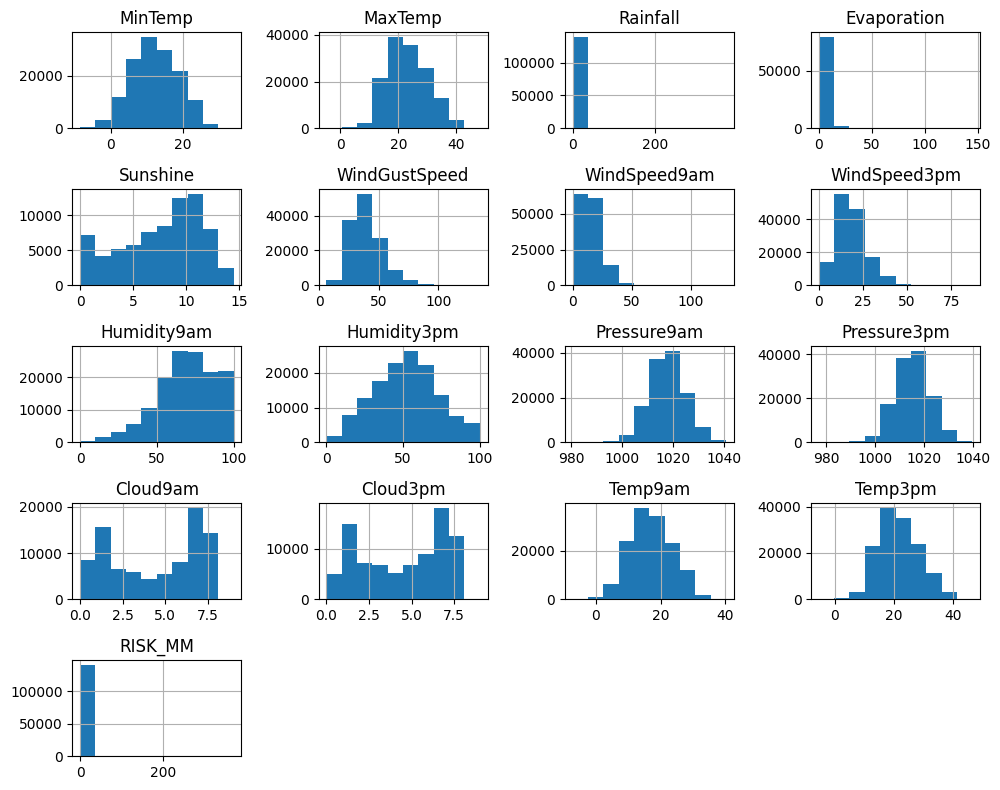

In [7]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

#3. Data Preparation

Para empezar con la preparación de los datos primero se realiza un pulido de los datos nulos que se encuentran en el data set, para ello utilizaremos la variable de Location ya que es muy significativa dentro del data set ademas de estar completa, podemos entrelazar entre las observaciones con nulos a esta ya que podría variar según la locación debido a que se tratan de factores climaticos


In [8]:
df_copia = df.copy()

##**Tratamiento de los datos Null numericos**

In [9]:
import pandas as pd

# Suponiendo que df_copia es tu DataFrame

# Imputaciones basadas en las distribuciones
df_copia['MinTemp'] = df_copia['MinTemp'].fillna(df_copia['MinTemp'].mean())
df_copia['MaxTemp'] = df_copia['MaxTemp'].fillna(df_copia['MaxTemp'].mean())
df_copia['Rainfall'] = df_copia['Rainfall'].fillna(df_copia['Rainfall'].median())
df_copia['Evaporation'] = df_copia['Evaporation'].fillna(df_copia['Evaporation'].median())
df_copia['Sunshine'] = df_copia['Sunshine'].fillna(df_copia['Sunshine'].median())
df_copia['WindGustSpeed'] = df_copia['WindGustSpeed'].fillna(df_copia['WindGustSpeed'].median())
df_copia['WindSpeed9am'] = df_copia['WindSpeed9am'].fillna(df_copia['WindSpeed9am'].median())
df_copia['WindSpeed3pm'] = df_copia['WindSpeed3pm'].fillna(df_copia['WindSpeed3pm'].median())
df_copia['Humidity9am'] = df_copia['Humidity9am'].fillna(df_copia['Humidity9am'].median())
df_copia['Humidity3pm'] = df_copia['Humidity3pm'].fillna(df_copia['Humidity3pm'].median())
df_copia['Pressure9am'] = df_copia['Pressure9am'].fillna(df_copia['Pressure9am'].mean())
df_copia['Pressure3pm'] = df_copia['Pressure3pm'].fillna(df_copia['Pressure3pm'].mean())
df_copia['Cloud9am'] = df_copia['Cloud9am'].fillna(df_copia['Cloud9am'].mode()[0])
df_copia['Cloud3pm'] = df_copia['Cloud3pm'].fillna(df_copia['Cloud3pm'].mode()[0])
df_copia['Temp9am'] = df_copia['Temp9am'].fillna(df_copia['Temp9am'].mean())
df_copia['Temp3pm'] = df_copia['Temp3pm'].fillna(df_copia['Temp3pm'].mean())


##Tratamiento de Nulls de los datos categoricos

####**RainToday**

In [10]:

df_copia['RainToday'].fillna(df_copia['RainToday'].mode()[0], inplace=True)

Location

In [11]:
df_copia['Location'].fillna(df_copia['Location'].mode()[0], inplace=True)

WindGustDir

In [12]:
df_copia['WindGustDir'].fillna(df_copia['WindGustDir'].mode()[0], inplace=True)

**WindGustDir9am**

In [13]:
df_copia['WindDir9am'].fillna(df_copia['WindDir9am'].mode()[0], inplace=True)

WindGustDir3pm

In [14]:
df_copia['WindDir3pm'].fillna(df_copia['WindDir3pm'].mode()[0], inplace=True)

In [15]:
for cantidad in df_copia.columns:
    total_nulos = df_copia[cantidad].isna().sum()
    total_datos = len(df)
    porcentaje_nulos = round(((total_nulos / total_datos) * 100),3 )
    print('Porcentaje de valores nulos de', cantidad, '=', porcentaje_nulos, '%')

Porcentaje de valores nulos de Date = 0.0 %
Porcentaje de valores nulos de Location = 0.0 %
Porcentaje de valores nulos de MinTemp = 0.0 %
Porcentaje de valores nulos de MaxTemp = 0.0 %
Porcentaje de valores nulos de Rainfall = 0.0 %
Porcentaje de valores nulos de Evaporation = 0.0 %
Porcentaje de valores nulos de Sunshine = 0.0 %
Porcentaje de valores nulos de WindGustDir = 0.0 %
Porcentaje de valores nulos de WindGustSpeed = 0.0 %
Porcentaje de valores nulos de WindDir9am = 0.0 %
Porcentaje de valores nulos de WindDir3pm = 0.0 %
Porcentaje de valores nulos de WindSpeed9am = 0.0 %
Porcentaje de valores nulos de WindSpeed3pm = 0.0 %
Porcentaje de valores nulos de Humidity9am = 0.0 %
Porcentaje de valores nulos de Humidity3pm = 0.0 %
Porcentaje de valores nulos de Pressure9am = 0.0 %
Porcentaje de valores nulos de Pressure3pm = 0.0 %
Porcentaje de valores nulos de Cloud9am = 0.0 %
Porcentaje de valores nulos de Cloud3pm = 0.0 %
Porcentaje de valores nulos de Temp9am = 0.0 %
Porcentaje d

##**Encoding**


**Para trabajar los valores nulos en las variables categóricas, es común utilizar la moda, ya que no podemos calcular el promedio de variables en formato de String. Para lograr esto, transformaremos los datos categóricos en datos numéricos mediante técnicas como el label encoding y el binary encoding. Esto es crucial debido a que la mayoría de los algoritmos de aprendizaje automático (modelos lineales y los árboles de decisión), no pueden procesar directamente variables categóricas (Compatibilidad con algoritmos).  Por otra parte, se eliminan los sesgos, que son interpretaciones erróneas del modelo, que se podrían producir por trabajar directamente con variables categóricas. Por último mejoraremos el rendimiento del modelo por que al ser de tipo numero le permitiremos capturar relaciones más complejas entre las variables, especialmente en algoritmos que usan regresión o el clustering.**

####**Location**

**En este caso se utiliza label encoding para convertir esta variable categorica en numerica en función de la columna 'Location'. Primero, crea un diccionario llamado letras_a_numeros que asigna un número único a cada dato encontrado en la columna 'Location'. Luego, recorre el DataFrame df_copia para asignar el número correspondiente, números en una nueva columna llamada 'Location_ID'.
Además, el código garantiza que no haya valores nulos en la columna 'Location_ID' al rellenarlos con la moda. Esto asegura que todos los registros tengan un valor numérico en la columna 'Location_ID'.**

In [16]:
letras_a_numeros = {}
contador = 1
for index, row in df_copia.iterrows():
    letra = row['Location']
    if letra not in letras_a_numeros:
        letras_a_numeros[letra] = contador
        contador += 1


numeros = []
for index, row in df_copia.iterrows():
    letra = row['Location']
    numeros.append(letras_a_numeros[letra])

df_copia['Location_ID'] = numeros



#### **WindGustDir**

In [17]:
letras_a_numeros = {}
contador = 1
for index, row in df_copia.iterrows():
    letra = row['WindGustDir']
    if letra not in letras_a_numeros:
        letras_a_numeros[letra] = contador
        contador += 1


numeros = []
for index, row in df_copia.iterrows():
    letra = row['WindGustDir']
    numeros.append(letras_a_numeros[letra])

df_copia['WindGustDir_numeros'] = numeros



**Al igual que en el caso anterior se utiliza label encoding para convertir esta variable categórica en numérica en función de la columna ‘WindGustDir’. Primero, crea un diccionario llamado letras_a_numeros que asigna un número único a cada dato encontrado en la columna ‘WindGustDir’. Luego, recorre el DataFrame df_copia para asignar el número correspondiente, números en una nueva columna llamada ‘WindGustDir_numeros’. Además, el código garantiza que no haya valores nulos en la columna ' WindGustDir_numeros’ al rellenarlos con la moda. Esto asegura que todos los registros tengan un valor numérico en la columna ' WindGustDir_numeros’.**

####**RainToday**

In [18]:
numeros = []
for index, row in df_copia.iterrows():
    letra = row['RainToday']
    if letra == 'Yes':
        numeros.append(1)
    elif letra == 'No':
        numeros.append(0)
    else:
        numeros.append(df_copia['RainToday'].fillna(df_copia['RainToday'].mode()[0], inplace=True))

# Agregamos la lista de números al DataFrame
df_copia['RainToday_Numerico'] = numeros

**Este código transforma la columna 'RainToday' en valores numéricos. Durante el proceso, asigna el valor 1 si la fila contiene 'Yes' en la columna 'RainToday', y 0 si contiene 'No'. Si encuentra valores nulos, los rellena con la moda de la columna 'RainToday' antes de agregar los números transformados a una nueva columna llamada 'RainToday_Numerico' en el DataFrame df_copia.**

####**RainTomorrow**

In [19]:
numeros = []
for index, row in df_copia.iterrows():
    letra = row['RainTomorrow']
    if letra == 'Yes':
        numeros.append(1)
    elif letra == 'No':
        numeros.append(0)
    else:
        numeros.append(df_copia['RainTomorrow'].fillna(df_copia['RainTomorrow'].mode()[0], inplace=True))

# Agregamos la lista de números al DataFrame
df_copia['RainTomorrow_ID'] = numeros

**Este código transforma la columna 'RainTomorrow' en valores numéricos. Durante el proceso, asigna el valor 1 si la fila contiene 'Yes' en la columna 'RainTomorrow', y 0 si contiene 'No'. Si encuentra valores nulos, los rellena con la moda de la columna 'RainTomorrow' antes de agregar los números transformados a una nueva columna llamada 'RainTomorrow_ID' en el DataFrame df_copia.**

####**WindDir9am**

In [20]:
letras_a_numeros = {}
contador = 1
for index, row in df_copia.iterrows():
    letra = row['WindDir9am']
    if letra not in letras_a_numeros:
        letras_a_numeros[letra] = contador
        contador += 1


numeros = []
for index, row in df_copia.iterrows():
    letra = row['WindDir9am']
    numeros.append(letras_a_numeros[letra])
df_copia['WindDir9amBin'] = numeros



**Al igual que en el caso anterior se utiliza label encoding para convertir esta variable categórica en numérica en función de la columna 'WindDir9am'. Primero, crea un diccionario llamado letras_a_numeros que asigna un número único a cada dato encontrado en la columna 'WindDir9am'. Luego, recorre el DataFrame df_copia para asignar el número correspondiente, números en una nueva columna llamada 'WindDir9amBin'. Además, el código garantiza que no haya valores nulos en la columna ' 'WindDir9amBin' al rellenarlos con la moda. Esto asegura que todos los registros tengan un valor numérico en la columna ' 'WindDir9amBin'.**

####**WindDir3pm**

In [21]:
letras_a_numeros = {}
contador = 1
for index, row in df_copia.iterrows():
    letra = row['WindDir3pm']
    if letra not in letras_a_numeros:
        letras_a_numeros[letra] = contador
        contador += 1
numeros = []
for index, row in df_copia.iterrows():
    letra = row['WindDir3pm']
    numeros.append(letras_a_numeros[letra])

df_copia['WindDir3pmBin'] = numeros


**Al igual que en el caso anterior se utiliza label encoding para convertir esta variable categórica en numérica en función de la columna 'WindDir3pm'. Primero, crea un diccionario llamado letras_a_numeros que asigna un número único a cada dato encontrado en la columna 'WindDir3pm'. Luego, recorre el DataFrame df_copia para asignar el número correspondiente, números en una nueva columna llamada 'WindDir3pmBin'. Además, el código garantiza que no haya valores nulos en la columna ' 'WindDir3pmBin' al rellenarlos con la moda. Esto asegura que todos los registros tengan un valor numérico en la columna ' 'WindDir3pmBin'.**

#Tratamiento de Outliers


MinTemp

In [22]:
Q1 = df_copia['MinTemp'].quantile(0.25)
Q3 = df_copia['MinTemp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copia['MinTemp'] = np.where(df_copia['MinTemp'] < lower_bound, lower_bound, df_copia['MinTemp'])
df_copia['MinTemp'] = np.where(df_copia['MinTemp'] > upper_bound, upper_bound, df_copia['MinTemp'])


MaxTemp

In [23]:
Q1 = df_copia['MaxTemp'].quantile(0.25)
Q3 = df_copia['MaxTemp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copia['MaxTemp'] = np.where(df_copia['MaxTemp'] < lower_bound, lower_bound, df_copia['MaxTemp'])
df_copia['MaxTemp'] = np.where(df_copia['MaxTemp'] > upper_bound, upper_bound, df_copia['MaxTemp'])


Humidity9am

In [24]:
Q1 = df_copia['Humidity9am'].quantile(0.25)
Q3 = df_copia['Humidity9am'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copia['Humidity9am'] = np.where(df_copia['Humidity9am'] < lower_bound, lower_bound, df_copia['Humidity9am'])
df_copia['Humidity9am'] = np.where(df_copia['Humidity9am'] > upper_bound, upper_bound, df_copia['Humidity9am'])


Humidity3pm

In [25]:
Q1 = df_copia['Humidity3pm'].quantile(0.25)
Q3 = df_copia['Humidity3pm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copia['Humidity3pm'] = np.where(df_copia['Humidity3pm'] < lower_bound, lower_bound, df_copia['Humidity3pm'])
df_copia['Humidity3pm'] = np.where(df_copia['Humidity3pm'] > upper_bound, upper_bound, df_copia['Humidity3pm'])


Pressure9am

In [26]:
Q1 = df_copia['Pressure9am'].quantile(0.25)
Q3 = df_copia['Pressure9am'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copia['Pressure9am'] = np.where(df_copia['Pressure9am'] < lower_bound, lower_bound, df_copia['Pressure9am'])
df_copia['Pressure9am'] = np.where(df_copia['Pressure9am'] > upper_bound, upper_bound, df_copia['Pressure9am'])


Pressure3pm

In [27]:
Q1 = df_copia['Pressure3pm'].quantile(0.25)
Q3 = df_copia['Pressure3pm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copia['Pressure3pm'] = np.where(df_copia['Pressure3pm'] < lower_bound, lower_bound, df_copia['Pressure3pm'])
df_copia['Pressure3pm'] = np.where(df_copia['Pressure3pm'] > upper_bound, upper_bound, df_copia['Pressure3pm'])


Temp9am

In [28]:
Q1 = df_copia['Temp9am'].quantile(0.25)
Q3 = df_copia['Temp9am'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copia['Temp9am'] = np.where(df_copia['Temp9am'] < lower_bound, lower_bound, df_copia['Temp9am'])
df_copia['Temp9am'] = np.where(df_copia['Temp9am'] > upper_bound, upper_bound, df_copia['Temp9am'])


Temp3pm

In [29]:
Q1 = df_copia['Temp3pm'].quantile(0.25)
Q3 = df_copia['Temp3pm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copia['Temp3pm'] = np.where(df_copia['Temp3pm'] < lower_bound, lower_bound, df_copia['Temp3pm'])
df_copia['Temp3pm'] = np.where(df_copia['Temp3pm'] > upper_bound, upper_bound, df_copia['Temp3pm'])


In [30]:
df_respaldito = df_copia.copy()

Para las variables las cuales tengan una distribución atipica se utilizaran 3 tipos de modelo de tratado con el fin de mejorar la eficiencia del tratado

IQR: Se toman los cuantiles con el fin de eliminar aquellos valores que esten mas lejanos a la media mediante discriminación entre valores que en este caso serán entre  0.25 y  0.75
PERCENTILES: Se utiliza este metodo en casos donde existe un sesgo alto hacia uno de los extremos de un dataset , ya sea hacia la derecha o la izquierda según se considere, con el fin de disminuir la diferencia entre los datos con mayor concentración y los mas alejados.

TRANSFORMACIÓN LOGARITMICA: Se utiliza este metodo cuando se tiene una distribución polarizada positiva y algunos valores son muy grandes

In [31]:
columns = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RISK_MM']

In [32]:
df_testeo = df_copia.copy()

In [33]:

def func_iqr(column):
  Q1 = df_testeo[column].quantile(0.25)
  Q3 = df_testeo[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Usando .loc para evitar el SettingWithCopyWarning
  df_testeo.loc[df_testeo[column] < lower_bound, column] = lower_bound
  df_testeo.loc[df_testeo[column] > upper_bound, column] = upper_bound


func_iqr('Evaporation')

In [34]:
def func_percentil(df, column, lower_quantile, upper_quantile):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    df.loc[:, column] = np.clip(df[column], lower_bound, upper_bound)

In [35]:
func_percentil(df_testeo,'Rainfall',0.04,0.96)

In [36]:
func_percentil(df_testeo,'RISK_MM',0.01,0.99)

In [37]:
df_testeo.loc[:, 'Sunshine'] = np.log1p(df_testeo['Sunshine'])

In [38]:
func_iqr('WindGustSpeed')

In [39]:
func_iqr('WindSpeed9am')

In [40]:
func_iqr('WindSpeed3pm')

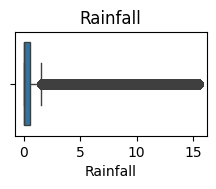

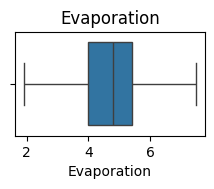

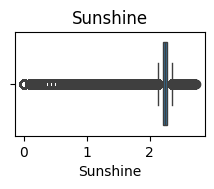

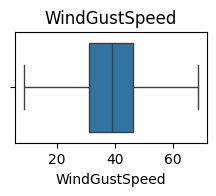

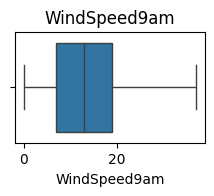

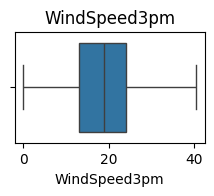

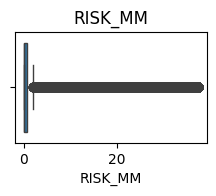

In [41]:
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Ajustar el número de filas y columnas según sea necesario
    sns.boxplot(x=df_testeo[col])  # Cambiar 'y' a 'x' para gráficos horizontales
    plt.title(col)
    plt.tight_layout()
    plt.show()


#Filtrado de datos a estudiar

Para el estudio del caso donde se busca la realización de predicción acerca de precipitaciones para el dia de mañana se tomaron en consideración las siguiente variables.

1. MinTemp
2. MaxTemp
3. Humidity9am
4. Humidity3pm
5. Cloud9am
6. Cloud3pm
7. RISK_MM
8. RainTomorrow_ID




####Dentro de la justificación por la que decidimos la utilización de estas variable se encuentra tanto las **MinTemp**, **MaxTemp** las cuales juntando tambien las humedades**(Humidity9am,Humidity3pm)** del dia y si se encuentra nublado **(Cloud9am,Cloud3pm)**  son factores importantes al momento de buscar pronostico de lluvia, ademas de variables que se buscan como objetivo como lo son **Raintomorrow_ID** y **RISK_MM**,  ademas de **Location_ID** Para de esta manera evaluar de buena forma las localidades donde llueve y hacer que el caso a buscar sea mas certero ademas de guiarse por las **Season** ya que se puede segmentar segun las temporadas que mas llueven.

In [42]:

ubicaciones_a_mantener = ['Gold Coast', 'Newcastle', 'Sydney', 'Sydney Airport',
                         'Wollongong', 'Adelaide', 'Albury', 'Ballarat', 'Bendigo', 'Melbourne', 'Melbourne Airport',
                         'Mount Gambier', 'Sale', 'Warrnambool', 'Albany', 'Badgerys' 'Creek',
                          'Coffs Harbour', 'Hobart',  'Launceston', 'Mount' 'Ginini', 'Portland', 'Walpole', 'Watsonia', 'Witchcliffe' ]

df_testeo = df_testeo[df_testeo['Location'].isin(ubicaciones_a_mantener)]
print(df_testeo)

              Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01      Albury     13.4     22.9       0.6          4.8   
1       2008-12-02      Albury      7.4     25.1       0.0          4.8   
2       2008-12-03      Albury     12.9     25.7       0.0          4.8   
3       2008-12-04      Albury      9.2     28.0       0.0          4.8   
4       2008-12-05      Albury     17.5     32.3       1.0          4.8   
...            ...         ...      ...      ...       ...          ...   
132885  2017-06-21  Launceston      1.7     12.6       3.0          4.8   
132886  2017-06-22  Launceston      1.5     11.1       0.0          4.8   
132887  2017-06-23  Launceston      4.7     12.8       5.4          4.8   
132888  2017-06-24  Launceston     -0.5     11.4       8.6          4.8   
132889  2017-06-25  Launceston      1.8     12.8       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Temp3pm  \
0       2.251292           W

###**Se escogieron estas ubicaciones debido a que nos centramos según el mapa de australia en aquellas zonas las cuales cullo tipo de clima e historial tienen mayor cantidad de precipitaciones anualmente (lo que se justicara con los datos de las lluvias de la columna Rainfall) junto con la discriminación de las demas debido a que no cumplen de manera geografica para el objetivo que se tiene en el caso a estudiar.**


In [43]:
import folium

# Coordenadas de las ubicaciones
coordinates = {
    'Gold Coast': (-28.0167, 153.4000),
    'Newcastle': (-32.9283, 151.7817),
    'Sydney': (-33.8688, 151.2093),
    'Sydney Airport': (-33.9399, 151.1753),
    'Wollongong': (-34.4278, 150.8931),
    'Adelaide': (-34.9285, 138.6007),
    'Albury': (-36.0737, 146.9135),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7570, 144.2794),
    'Melbourne': (-37.8136, 144.9631),
    'Melbourne Airport': (-37.6690, 144.8410),
    'Mount Gambier': (-37.8310, 140.7798),
    'Sale': (-38.1045, 147.0688),
    'Warrnambool': (-38.3818, 142.4875),
    'Albany': (-35.0269, 117.8830),
    'Badgerys Creek': (-33.8778, 150.7231),
    'Coffs Harbour': (-30.2963, 153.1146),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4332, 147.1441),
    'Mount Ginini': (-35.5297, 148.7728),
    'Portland': (-38.3473, 141.6043),
    'Walpole': (-34.9770, 116.7339),
    'Watsonia': (-37.7160, 145.0830),
    'Witchcliffe': (-34.0429, 115.1458)
}

# Crear un mapa centrado en Australia
m = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

# Añadir ubicaciones al mapa
for city, (lat, lon) in coordinates.items():
    folium.Marker([lat, lon], popup=city).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('map.html')

# Para mostrar el mapa en Jupyter Notebook (opcional)
from IPython.display import IFrame
IFrame('map.html', width=700, height=500)


In [44]:
columnas_numericas = df_testeo.select_dtypes(include=['int64','float64'])

# Crear un nuevo DataFrame con las columnas numéricas
df_numerico = pd.DataFrame(columnas_numericas)

columnas_numericas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53706 entries, 0 to 132889
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              53706 non-null  float64
 1   MaxTemp              53706 non-null  float64
 2   Rainfall             53706 non-null  float64
 3   Evaporation          53706 non-null  float64
 4   Sunshine             53706 non-null  float64
 5   WindGustSpeed        53706 non-null  float64
 6   WindSpeed9am         53706 non-null  float64
 7   WindSpeed3pm         53706 non-null  float64
 8   Humidity9am          53706 non-null  float64
 9   Humidity3pm          53706 non-null  float64
 10  Pressure9am          53706 non-null  float64
 11  Pressure3pm          53706 non-null  float64
 12  Cloud9am             53706 non-null  float64
 13  Cloud3pm             53706 non-null  float64
 14  Temp9am              53706 non-null  float64
 15  Temp3pm              53706 non-null  flo

In [45]:
for columna in df_numerico.columns:
    if df_numerico[columna].dtype == 'int64':
        df_numerico[columna] = df_numerico[columna].astype('float64')

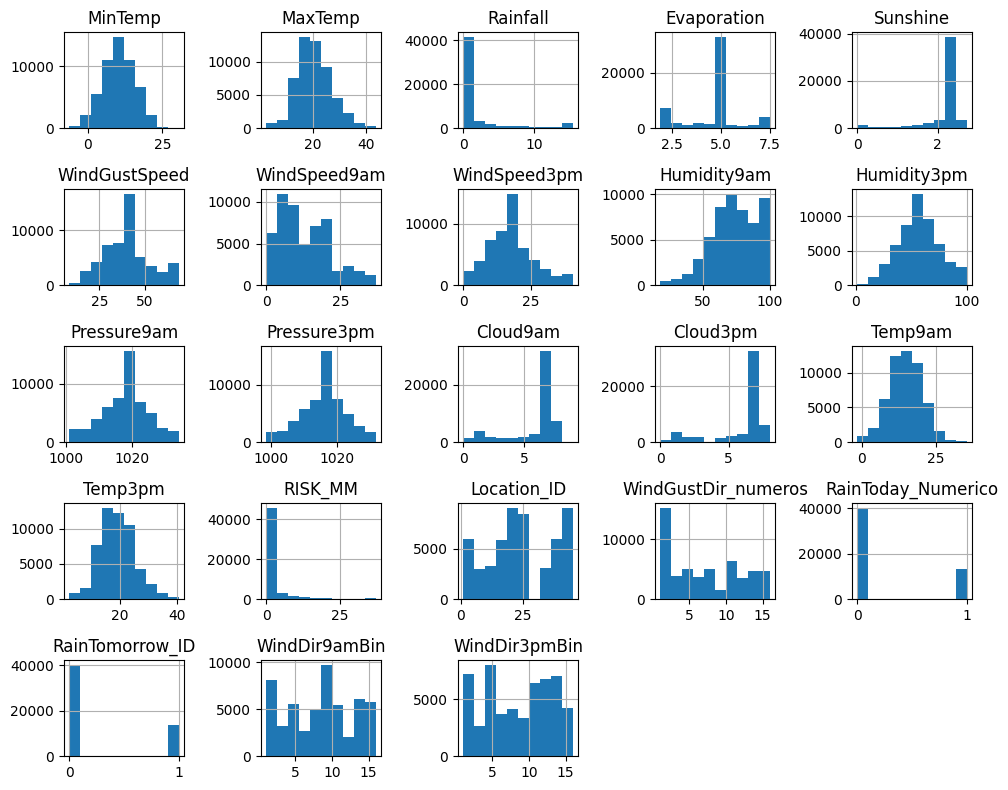

In [46]:
df_numerico.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

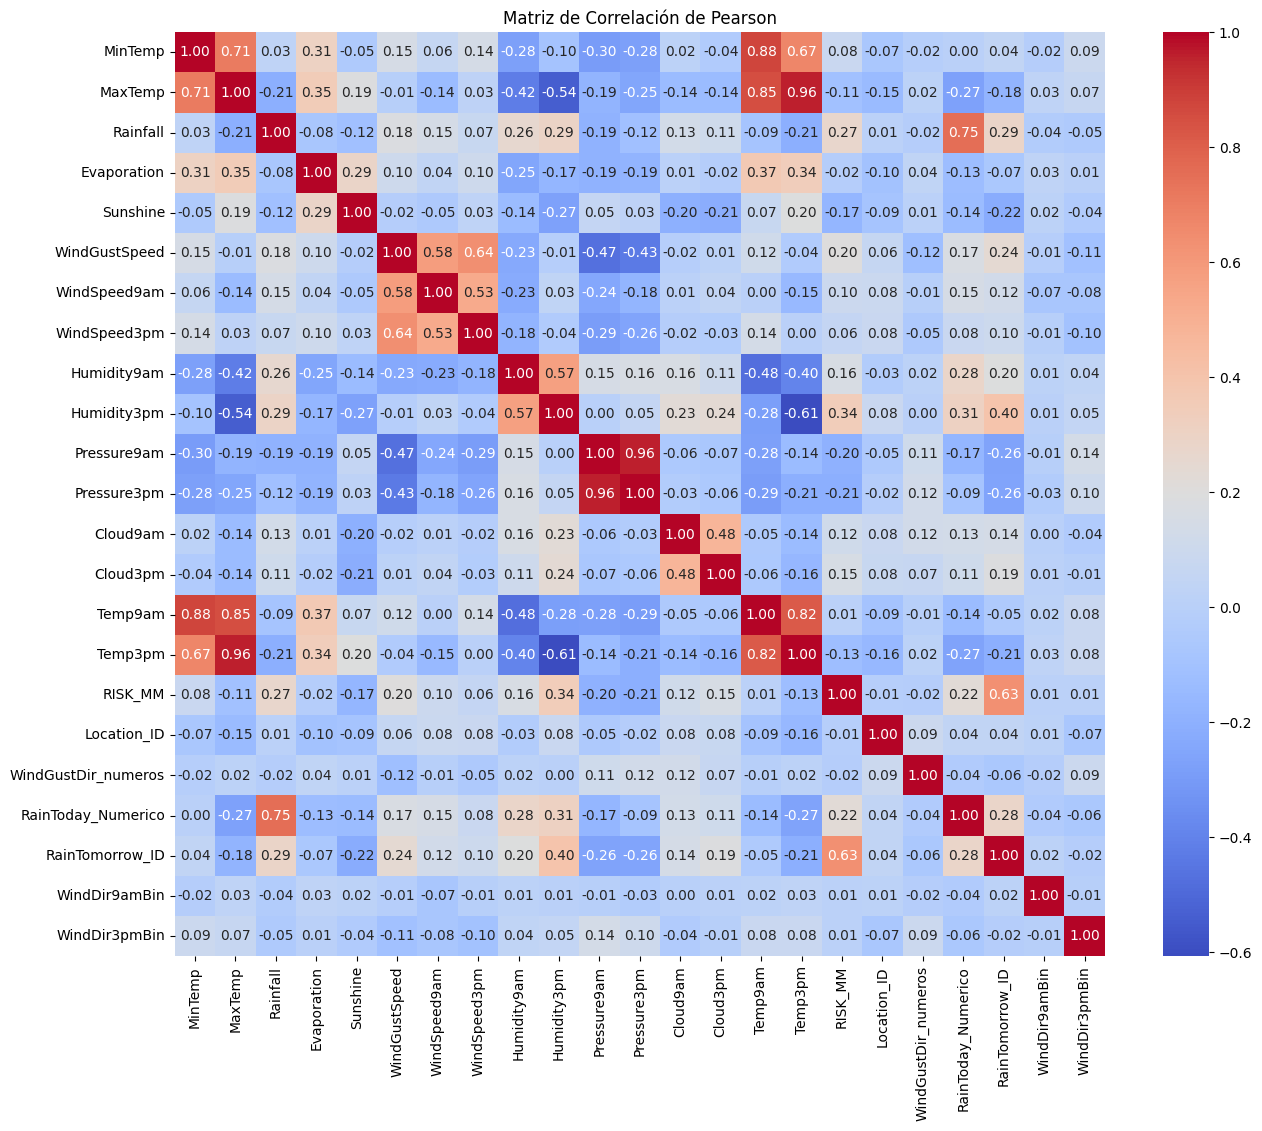

In [47]:
subset_data = df_numerico

# Calcular la matriz de correlación de Pearson
matriz_correlacion = subset_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()

In [48]:
columnas_seleccionadas = [
    'MinTemp',
    'MaxTemp',
    'Temp3pm',
    'Temp9am',
    'Humidity9am',
    'Humidity3pm',
    'Evaporation',
    'RainToday_Numerico',
    'RainTomorrow_ID',
    'Location_ID',

]

In [49]:
df_estudiar = df_testeo[columnas_seleccionadas].copy()
print(df_estudiar)

        MinTemp  MaxTemp  Temp3pm  Temp9am  Humidity9am  Humidity3pm  \
0          13.4     22.9     21.8     16.9         71.0         22.0   
1           7.4     25.1     24.3     17.2         44.0         25.0   
2          12.9     25.7     23.2     21.0         38.0         30.0   
3           9.2     28.0     26.5     18.1         45.0         16.0   
4          17.5     32.3     29.7     17.8         82.0         33.0   
...         ...      ...      ...      ...          ...          ...   
132885      1.7     12.6     12.0      4.6         93.0         44.0   
132886      1.5     11.1     10.0      4.7         84.0         67.0   
132887      4.7     12.8     12.4     10.1         90.0         83.0   
132888     -0.5     11.4     11.0      1.9         96.0         58.0   
132889      1.8     12.8     12.4      9.4         84.0         73.0   

        Evaporation  RainToday_Numerico  RainTomorrow_ID  Location_ID  
0               4.8                   0                0       

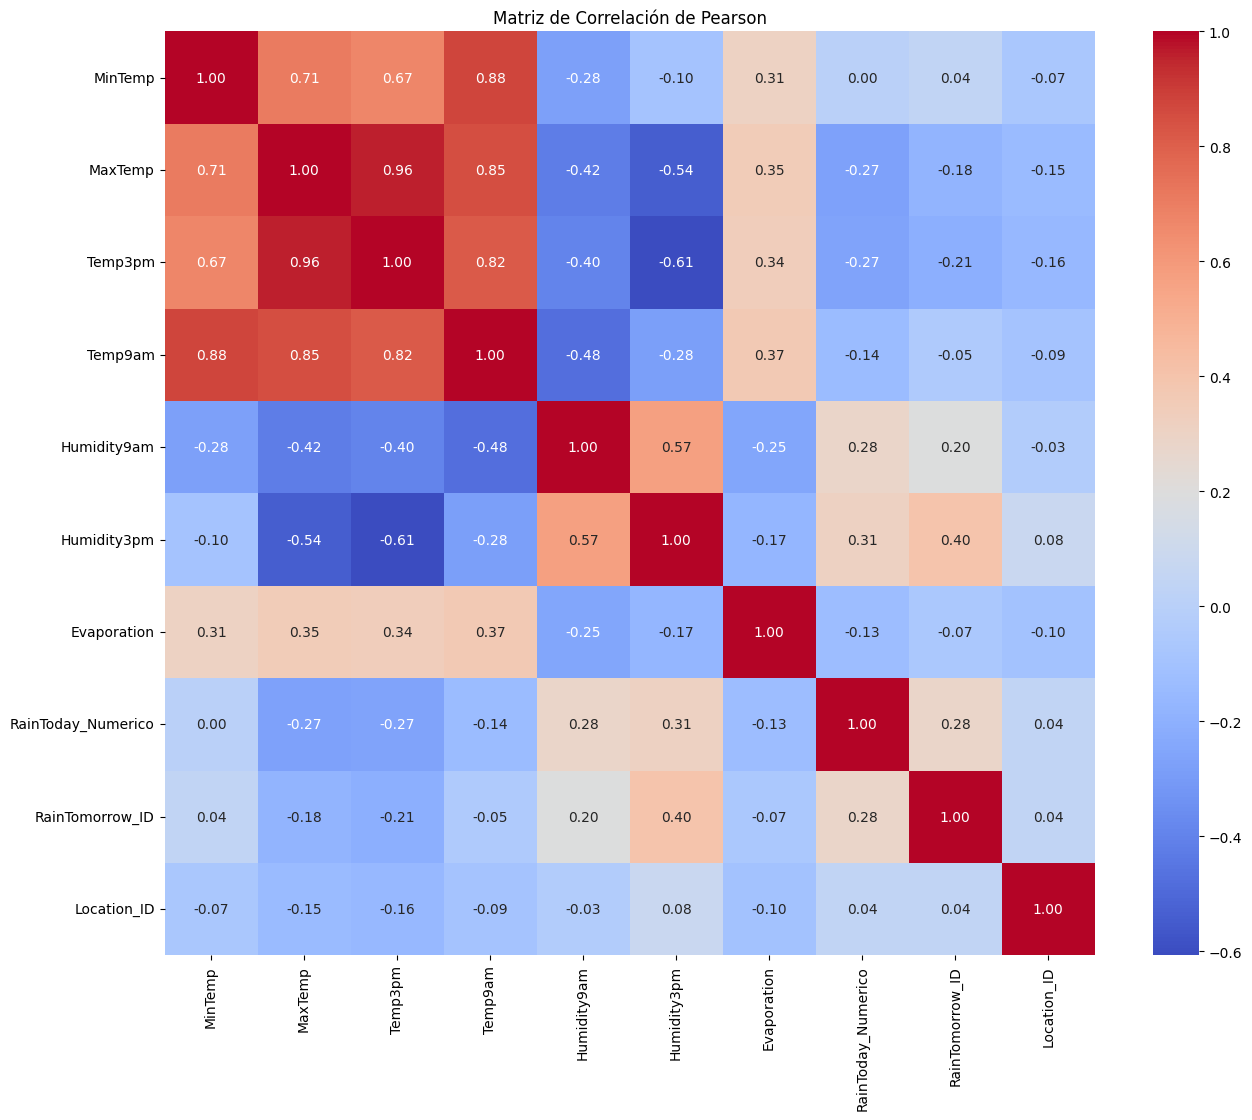

In [50]:

subset_data = df_estudiar

# Calcular la matriz de correlación de Pearson
matriz_correlacion = subset_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()

####Explicación: Como se puede ver en la matriz de correlación de pearson existe un cumulo de datos los cuales tienen una relación bastante parecida entre si, como los son las columnas Humidity, Cloud, Risk_MM , RainTomorrow , pese a que no tenga con coeficiente de correlación tan alto, muestran un patron de estudio el cual se puede evaluar mas en profundidad para así determinar el modelo de aprendizaje optimo

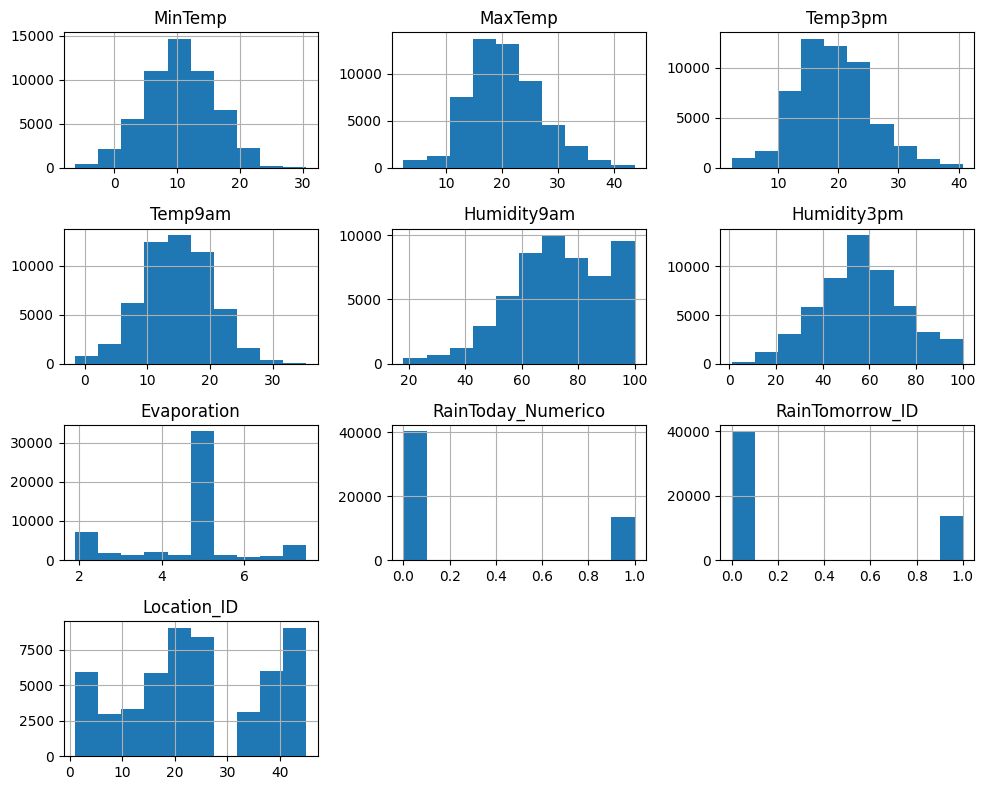

In [51]:
df_estudiar.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

##Normalización de datos

In [52]:
datos_norm = (df_estudiar - df_estudiar.min())/(df_estudiar.max() - df_estudiar.min())

datos_norm.describe()

,MinTemp,MaxTemp,Temp3pm,Temp9am,Humidity9am,Humidity3pm,Evaporation,RainToday_Numerico,RainTomorrow_ID,Location_ID
count,53706.000000,53706.000000,53706.000000,53706.000000,53706.000000,53706.000000,53706.000000,53706.000000,53706.000000,53706.000000
mean,0.454186,0.438851,0.436940,0.439808,0.673780,0.561131,0.471018,0.250791,0.254385,0.518920
std,0.146891,0.157283,0.161448,0.150615,0.209649,0.188233,0.242534,0.433473,0.435519,0.310678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355978,0.331311,0.328125,0.339674,0.536585,0.434343,0.482143,0.000000,0.000000,0.318182
50%,0.456522,0.425971,0.427083,0.440217,0.670732,0.555556,0.517857,0.000000,0.000000,0.454545
75%,0.554348,0.532767,0.528646,0.540761,0.841463,0.686869,0.517857,1.000000,1.000000,0.818182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#4.Evaluation

##la variable objetivo a estudiar la cual se decidió utilizar es MinTemp ya que cuenta con un distribución normalizada ademas de tener datos variados sin un sesgo alto como lo es RISK_MM en el cual se imposibilita el tratado de los datos ya que la gran población de la anterior variable objetivo era un 66% aproximadamente de datos equivalentes a 0 por lo cual se imposibilitaba el estudio.

## 2.1 - Modelo Regresion Lineal

In [53]:
print(datos_norm)

         MinTemp   MaxTemp   Temp3pm   Temp9am  Humidity9am  Humidity3pm  \
0       0.532609  0.496359  0.507812  0.500000     0.646341     0.212121   
1       0.369565  0.549757  0.572917  0.508152     0.317073     0.242424   
2       0.519022  0.564320  0.544271  0.611413     0.243902     0.292929   
3       0.418478  0.620146  0.630208  0.532609     0.329268     0.151515   
4       0.644022  0.724515  0.713542  0.524457     0.780488     0.323232   
...          ...       ...       ...       ...          ...          ...   
132885  0.214674  0.246359  0.252604  0.165761     0.914634     0.434343   
132886  0.209239  0.209951  0.200521  0.168478     0.804878     0.666667   
132887  0.296196  0.251214  0.263021  0.315217     0.878049     0.828283   
132888  0.154891  0.217233  0.226563  0.092391     0.951220     0.575758   
132889  0.217391  0.251214  0.263021  0.296196     0.804878     0.727273   

        Evaporation  RainToday_Numerico  RainTomorrow_ID  Location_ID  
0          0.51

In [54]:
#División en inputs y outputs
X = datos_norm.drop('MinTemp', axis = 1)
y = datos_norm['MinTemp']

In [55]:
#biblioteca para padronizar los datos
from sklearn.preprocessing import StandardScaler

In [56]:
data_x = datos_norm.iloc[:,0:datos_norm.columns.size-1].values
data_x

array([[0.5326087 , 0.49635922, 0.5078125 , ..., 0.51785714, 0.        ,
        0.        ],
       [0.36956522, 0.54975728, 0.57291667, ..., 0.51785714, 0.        ,
        0.        ],
       [0.51902174, 0.56432039, 0.54427083, ..., 0.51785714, 0.        ,
        0.        ],
       ...,
       [0.29619565, 0.25121359, 0.26302083, ..., 0.51785714, 1.        ,
        1.        ],
       [0.1548913 , 0.21723301, 0.2265625 , ..., 0.51785714, 1.        ,
        0.        ],
       [0.2173913 , 0.25121359, 0.26302083, ..., 0.51785714, 0.        ,
        0.        ]])

In [57]:
data_y = datos_norm.iloc[:,datos_norm.columns.size-1].values
data_y

array([0., 0., 0., ..., 1., 1., 1.])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [61]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [62]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 0.004048793807628993
Coeficiente de determinación (R^2): 0.8127483539870191


In [63]:
# Imprimimos los coeficientes y el intercepto
print(model.intercept_)
print(model.coef_)

-0.06647955532909994
[-0.00932841  0.01376779  0.94246498  0.07935212  0.06770914  0.00225204
  0.02649476  0.00288621  0.00799885]


Text(0.5, 0, 'Index')

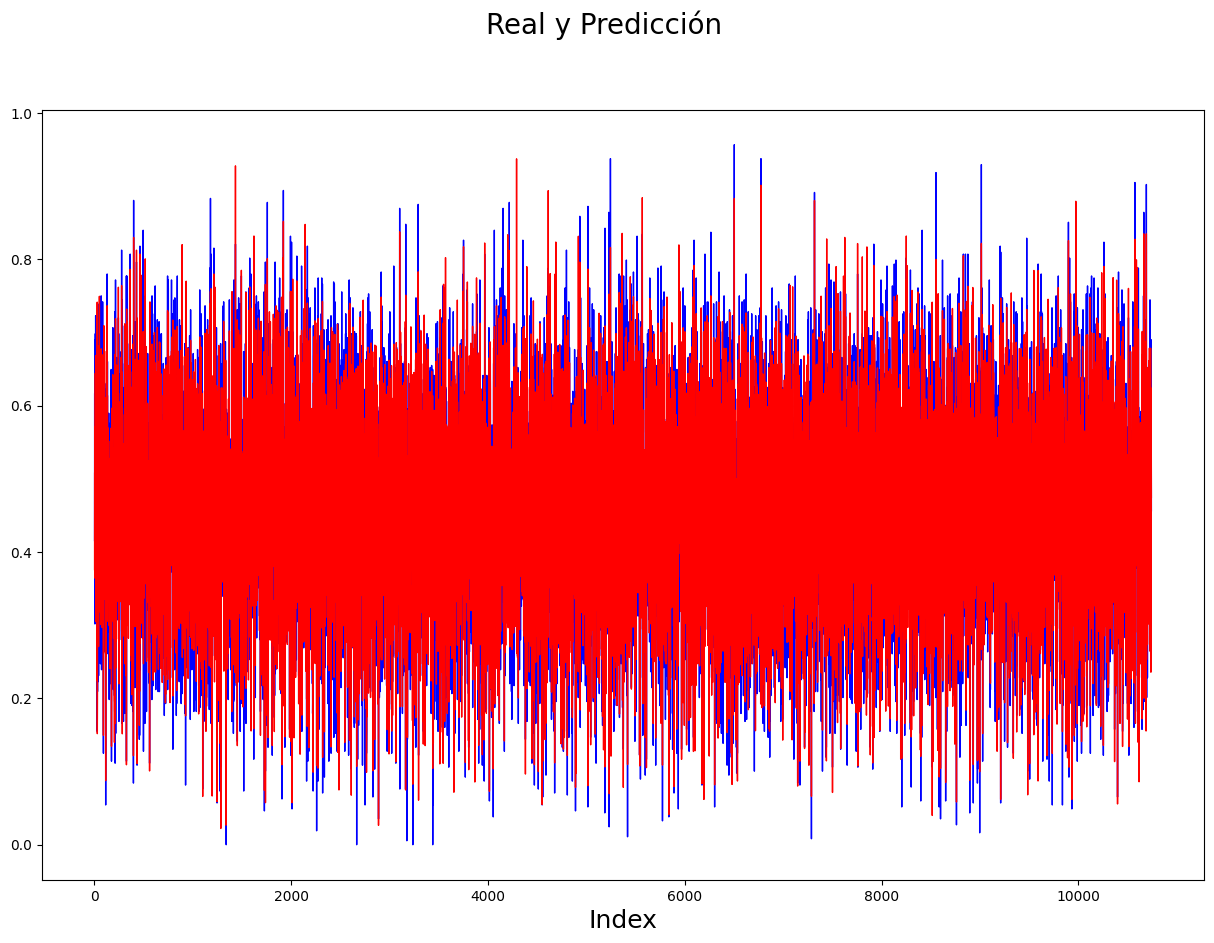

In [64]:
# Real contra predicción
plt.figure(figsize = (15,10))

c = [i for i in range(1,len(X_test.index)+1,1)] # generating index

plt.plot(c,y_test, color="blue", linewidth=1, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=1, linestyle="-")
plt.suptitle('Real y Predicción', fontsize=20)
plt.xlabel('Index', fontsize=18)

In [65]:
import numpy as np

def error_absoluto_medio(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def error_cuadratico_medio(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def raiz_cuadratica_media(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - np.mean(y_true)) ** 2).sum()
    return 1 - (numerator / denominator)

def error_porc_abs_medio(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Suponiendo que df_estudiar es tu DataFrame y RISK_MM es tu variable objetivo
# Dividir los datos en características (X) y variable objetivo (y)
X = df_estudiar.drop(columns=['MinTemp'])
y = df_estudiar['MinTemp']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión (ejemplo: Regresión Lineal)
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de rendimiento
mae = error_absoluto_medio(y_test, y_pred)
mse = error_cuadratico_medio(y_test, y_pred)
rmse = raiz_cuadratica_media(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = error_porc_abs_medio(y_test, y_pred)


# Mostrar resultados
print("Error Absoluto Medio (MAE)", mae)
print("Error Cuadrático Medio (MSE)", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R^2):", r2)
print("Error Porcentual Absoluto Medio (MAPE):", mape)


Error Absoluto Medio (MAE) 1.7871234019966808
Error Cuadrático Medio (MSE) 5.483038526043488
Raíz del Error Cuadrático Medio (RMSE): 2.3415888892039716
Coeficiente de Determinación (R^2): 0.8127483539870191
Error Porcentual Absoluto Medio (MAPE): inf


##*Modelo de arbol de decisión*

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
model = DecisionTreeRegressor(max_depth=2,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 8.972997513552171
R^2 Score: 0.6935625117163908


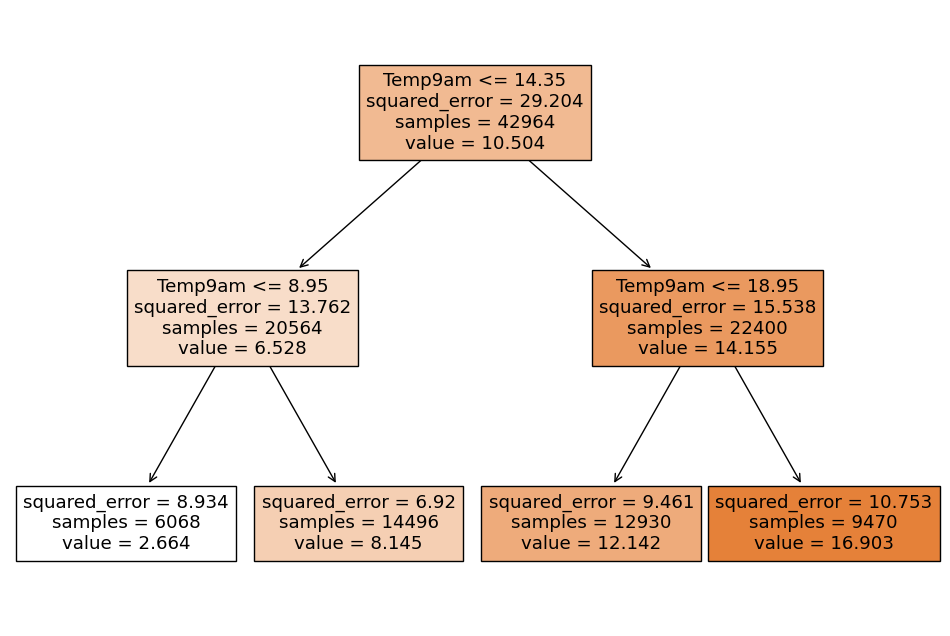

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Suponiendo que model es tu modelo de árbol de decisión entrenado
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

#5. Elección de modelo

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Árbol de Decisión
model_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# Calcular métricas de rendimiento para el modelo de árbol de decisión
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print('Puntuación modelo árbol de decisión:')
print("Mean Squared Error (MSE):", mse_tree)
print("R^2 Score:", r2_tree)

# Modelo de Regresión Lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Calcular métricas de rendimiento para el modelo de regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('\nPuntuación modelo Regresión Lineal:')
print(f'Mean Squared Error (MSE): {mse_linear}')
print(f'R^2 Score: {r2_linear}')

Puntuación modelo árbol de decisión:
Mean Squared Error (MSE): 8.835615882614999
R^2 Score: 0.6992997443878959

Puntuación modelo Regresión Lineal:
Mean Squared Error (MSE): 5.420811024792491
R^2 Score: 0.8155149247731234


Teniendo en consideración las puntuaciones de ambos metodos es superior el modelo de regresión Lineal según  los siguiente parametros:


*   Se tiene un R² mucho mejor con una diferencia de 0.20458 lo cual es igual a un 20.5% mejor el rendimiento por parte del modelo de regresión lineal al momento de predecir.

*   Se tiene una diferencia de error medio cuadratico equivalente a -6.01 por lo que significa una mejor predicción con menores errores en comparación al otro modelo.







#Ajuste Modelo Regresión Lineal

## Cross validation Regresión Lineal

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [ ]:
print(cross_val_score(model,
                     X,
                     y,
                     cv=5,scoring='r2'))

[0.72619683 0.70181809 0.62705589 0.60201526 0.60109369]


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegúrate de que el número de componentes no exceda el límite permitido
n_samples, n_features = X.shape
max_components = min(n_samples, n_features)

# Definir el pipeline
pipeline = Pipeline([
    ('pca', PCA()),
    ('model', LinearRegression())
])

# Definir los parámetros para el grid search
param_grid = {
    'pca__n_components': np.arange(1, max_components + 1, 1),
    'model__fit_intercept': [True, False]
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', error_score='raise')

# Ajustar el grid search al conjunto de datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejor R2 score en validación cruzada:", best_score)

# Validación cruzada con los mejores parámetros en todo el conjunto de datos
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

print("Scores de validación cruzada con los mejores parámetros:", cv_scores)
print("Promedio de R^2 score en validación cruzada:", np.mean(cv_scores))

Mejores parámetros: {'model__fit_intercept': True, 'pca__n_components': 9}
Mejor R2 score en validación cruzada: 0.8148902198258478
Scores de validación cruzada con los mejores parámetros: [0.85523474 0.80413982 0.76026309 0.76134382 0.72974625]
Promedio de R^2 score en validación cruzada: 0.7821455438778451


## Predicciones y evaluaciones

In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

## Evaluación del modelo

In [83]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, mean_squared_error, r2_score, explained_variance_score,
                             mean_absolute_error, median_absolute_error)

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
medae = median_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred_test)
max_error = np.max(np.abs(y_test - y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100


In [ ]:
print("Mean Squared Error (MSE) en el conjunto de prueba:", mse)
print("Mean Absolute Error (MAE) en el conjunto de prueba:", mae)
print("Median Absolute Error (MedAE) en el conjunto de prueba:", medae)
print("R^2 Score en el conjunto de prueba:", r2)
print("Adjusted R^2 Score en el conjunto de prueba:", adj_r2)
print("Explained Variance Score en el conjunto de prueba:", evs)
print("Max Error en el conjunto de prueba:", max_error)
print("Mean Absolute Percentage Error (MAPE) en el conjunto de prueba:", mape, "%")

Mean Squared Error (MSE) en el conjunto de prueba: 5.483038526043488
Mean Absolute Error (MAE) en el conjunto de prueba: 1.7871234019966806
Median Absolute Error (MedAE) en el conjunto de prueba: 1.5077564712662204
R^2 Score en el conjunto de prueba: 0.8127483539870191
Adjusted R^2 Score en el conjunto de prueba: 0.8125913222302061
Explained Variance Score en el conjunto de prueba: 0.8127900840499735
Max Error en el conjunto de prueba: 19.949166111996888
Mean Absolute Percentage Error (MAPE) en el conjunto de prueba: inf %


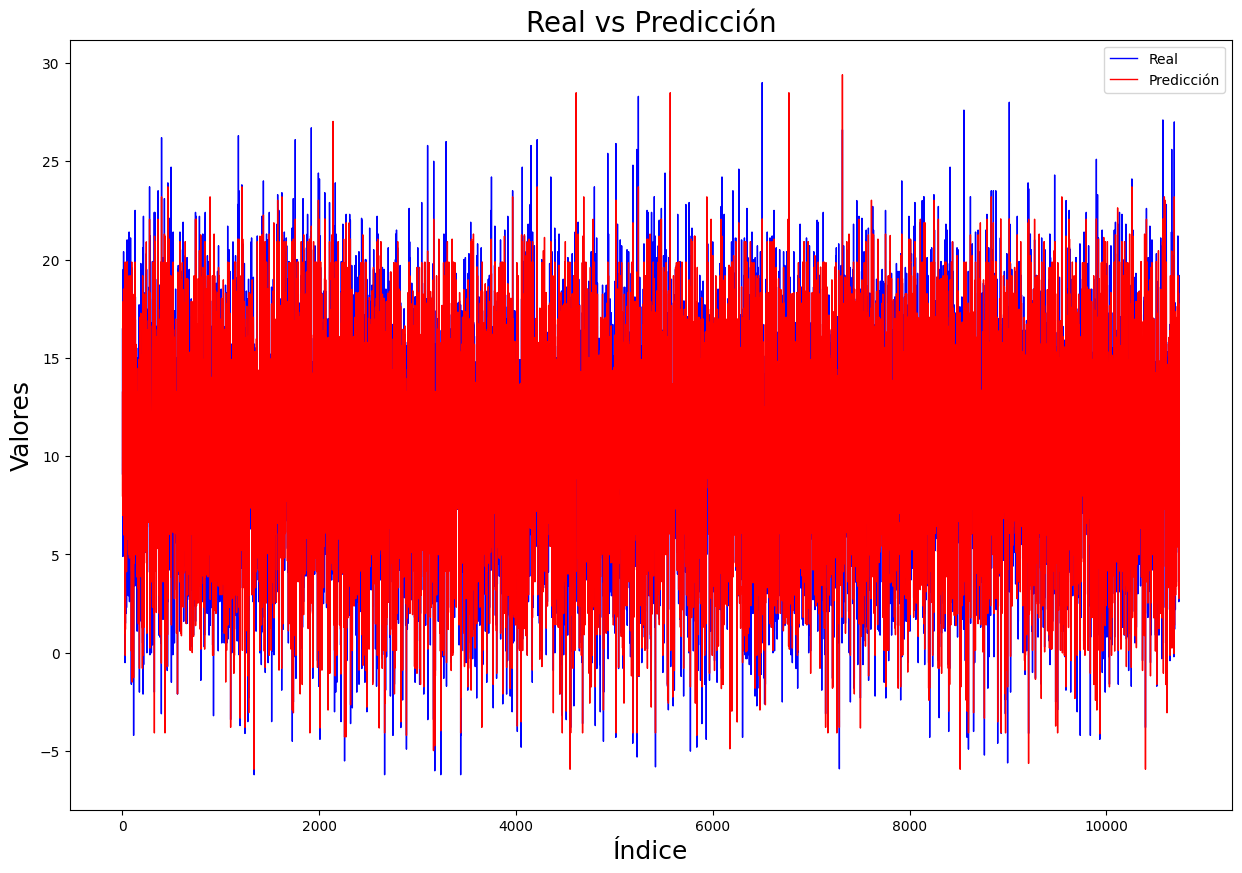

In [ ]:
# Gráfico de valores reales contra predicciones
plt.figure(figsize=(15, 10))

# Generar índices para el gráfico
indices = np.arange(len(y_test))

# Plotear valores reales
plt.plot(indices, y_test, color="blue", linewidth=1, linestyle="-", label="Real")

# Plotear valores predichos
plt.plot(indices, y_pred_test, color="red", linewidth=1, linestyle="-", label="Predicción")

# Añadir título y etiquetas
plt.title('Real vs Predicción', fontsize=20)
plt.xlabel('Índice', fontsize=18)
plt.ylabel('Valores', fontsize=18)

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()

### Distribución de Errores

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve


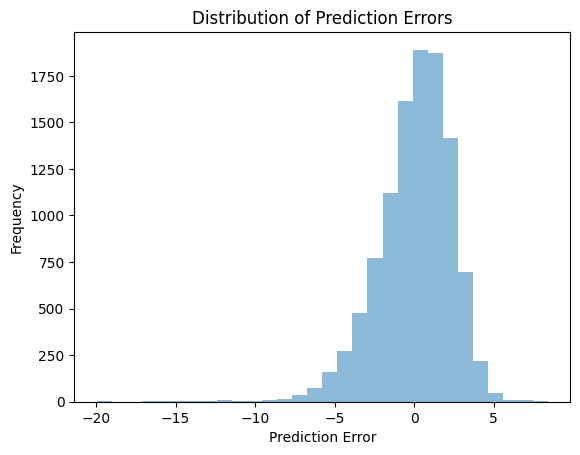

In [ ]:
errors = y_test - y_pred_test
plt.figure()
plt.hist(errors, bins=30, alpha=0.5)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

##Curva ROC / AUC

##Curva de aprendizaje

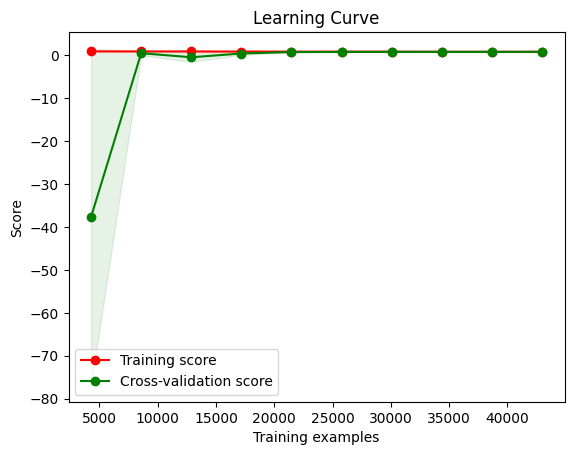

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.title('Learning Curve')
plt.show()

##Explicación

para esta parte del proyecto se generará una busqueda de los mejores parametros para que al momento de querer mejorar el modelo este se pueda adecuar a los mejores puntos existentes por lo que se efectua los siguientes pasos:

- realizamos una busqueda de los mejores parametros a través de gridsearchCV principalmente de 2 parametros que es el PCA donde se buscará la estimación del numero de componetes optimos para que sea adecuado su uso ya que tiene como objetivo la disminución de la varianza de los datos haciendo que sea mas homogeneo ya que transforma las caracterisiticas (Columnas) originales en un conjunto de componentes, la idea de esto es reducir el numero de caracteristicas manteniendo la mayor cantidad de información
-Ademas de dejar las opciones utilizar el intercepto: Esta función hace que el modelo al momento de generarse no necesariamente pase por el punto 0,0 lo cual puede generar que el modelo se pueda ajustar de mejor manera
-Luego de utilizado el pipeline y los hiperparametros a utilizar nos entrega cuales son los mejores parametros a utilizar que en el caso sería :
  - Intercepto = True (Justificación: esto se puede deber ya que los datos no necesariamente deben partir desde cero segun las caracteristicas que se tiene el modelo en el cual abunda mayormente sobre el 0 por lo que podría mejorar el modelo el considerar efectuar la regresión de otros puntos que se ajusten)
  - n° de componentes =  8 (Justificación: En este caso deja estimado que se debe considerar un análisis de componentes principales con un numero equivalente a 8 por lo que se crearían efectivamente 8 conjunto de datos para que el modelo funcione de mejor manera)
- Adicionalmente nos entrega una baja poco considerable al modelo en comparativa a los resultados antes del procesamiento al momento de hacer una validación cruzada, donde se baja de 81,5% de R2 hacia un 78,5% lo cual demuestra que el modelo si esta cumpliendo bien con el objetivo de busqueda de la variable Y ya que no demuestra tener un overfitting al momento de predecir los datos de prueba, esto explicaria que, al momento de utilizar los mejores parametros los resultado no se vean tan afectado siendo estos casi igual por lo que reafirmo que el modelo no se encuentra sobreajustado

-Las metricas de error tan


#Ajuste Modelo arbol de decisión

##Cross Validation


In [75]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.02],
    'ccp_alpha': [0.0, 0.01, 0.02]
}

# Crear el modelo para regresión
model_tree = DecisionTreeRegressor()

# Configurar GridSearchCV
dt_cv = GridSearchCV(model_tree, param_grid_dt, cv=10, error_score='raise')

# Intentar entrenar el modelo
try:
    dt_cv.fit(X, y)
except Exception as e:
    print("An error occurred during model fitting:")
    print(e)

# Obtener el mejor puntaje obtenido durante la validación cruzada
print("Mejor puntaje de validación cruzada:", dt_cv.best_score_)

Mejor puntaje de validación cruzada: 0.7619598712889919


In [76]:

dt_cv.best_params_


{'ccp_alpha': 0.0,
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
# Entrenar el modelo con los mejores hiperparámetros
best_arbol = DecisionTreeRegressor(**dt_cv.best_params_, random_state=567)


best_arbol.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=567)

In [79]:
y_pred_train = best_arbol.predict(X_train)
y_pred_test = best_arbol.predict(X_test)


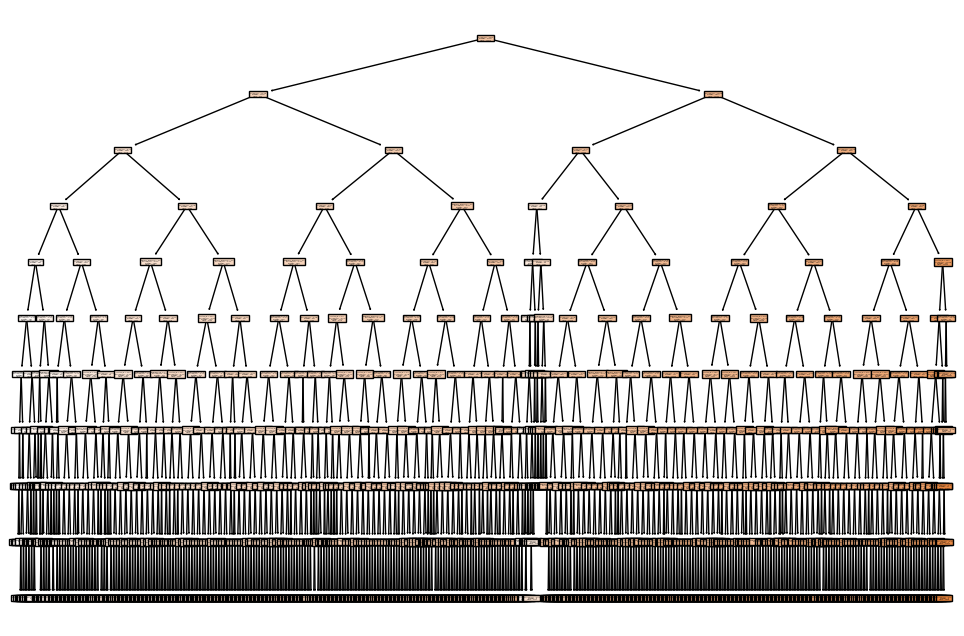

In [87]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Suponiendo que model es tu modelo de árbol de decisión entrenado
plt.figure(figsize=(12, 8))
plot_tree(best_arbol, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

##Metricas del arbol de decisión

In [84]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
medae = median_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred_test)
max_error = np.max(np.abs(y_test - y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100 if np.all(y_test != 0) else np.inf

print("Mean Squared Error (MSE) en el conjunto de prueba:", mse)

print("Mean Absolute Error (MAE) en el conjunto de prueba:", mae)

print("Median Absolute Error (MedAE) en el conjunto de prueba:", medae)

print("R^2 Score en el conjunto de prueba:", r2)

print("Adjusted R^2 Score en el conjunto de prueba:", adj_r2)

print("Explained Variance Score en el conjunto de prueba:", evs)

print("Max Error en el conjunto de prueba:", max_error)

print("Mean Absolute Percentage Error (MAPE) en el conjunto de prueba:", mape, "%")

Mean Squared Error (MSE) en el conjunto de prueba: 4.602762571564635
Mean Absolute Error (MAE) en el conjunto de prueba: 1.6441708139999747
Median Absolute Error (MedAE) en el conjunto de prueba: 1.3298590626024276
R^2 Score en el conjunto de prueba: 0.8433553585648083
Adjusted R^2 Score en el conjunto de prueba: 0.8432678041136272
Explained Variance Score en el conjunto de prueba: 0.8434018835202778
Max Error en el conjunto de prueba: 15.426399728729265
Mean Absolute Percentage Error (MAPE) en el conjunto de prueba: inf %


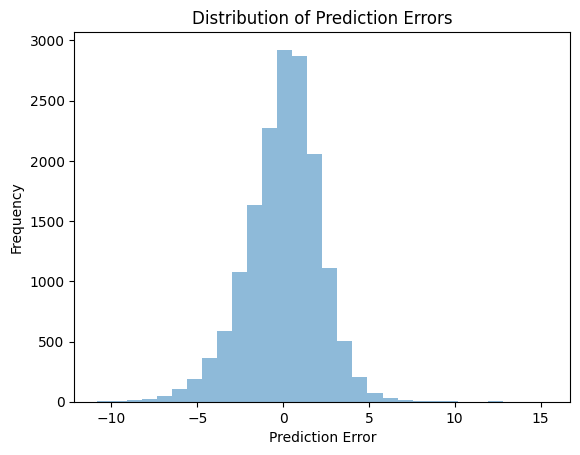

In [85]:
# Histograma de los errores de predicción
errors = y_test - y_pred_test
plt.figure()
plt.hist(errors, bins=30, alpha=0.5)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

##  Curva de aprendizaje

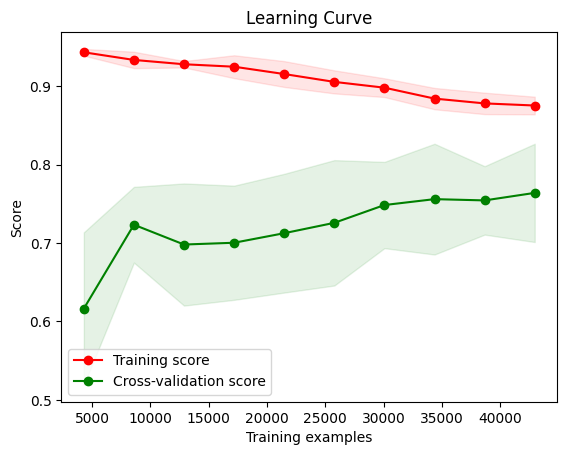

In [86]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_arbol, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.title('Learning Curve')
plt.show()

##Hiperparametros utilizados:


- max_depth:controla la profundidad máxima del árbol de decisión.

- min_samples_split:especifica el número mínimo de muestras necesarias para dividir un nodo

- min_samples_leaf: especifica el número mínimo de muestras que un nodo hoja debe tener

- max_leaf_nodes: limita el número máximo de nodos hoja en el árbol

- min_impurity_decrease: especifica el umbral mínimo de disminución de impureza que debe lograrse para que un nodo se divida.

- ccp_alpha:  reduce el tamaño del árbol eliminando nodos que no proporcionan una mejora significativa en la predicción

##Explicación


Se realizaron una validación cruzada utilizando los mejores parametros a través de *GridSearchCV* por lo que nos da un valor de 0.762 lo cual nos sugiere que en promedio el modelo esta teniendo un buen rendimiento pese a la validación cruzada.

Luego de generado los mejores parametros se vuelve a reajustar el modelo obteniendo una mejora en los valores de R^2 Por lo que nos da las siguiente conclusiones:
- R^2 Score: 0.699
- R^2 Score con cross Validation: 0.762
- R^2 Score con los mejores parametros 0.84

lo que se puede concluir según estos parametros que el modelo sin validación cruzada tiene dificultades si es que no se le entregan parametros adecuados para su funcionamiento, dentro de la validación cruzada existe una mejora en la media del rendimiento, por lo que luego sacado los mejores parametros existe una alza considerable en el R^2 equivalente a un 15%.

como medida para ver si el modelo se encuentra con *Overfitting* realizamos una prueba utilizando el R^2 ajustado donde se utilizan la variable independiente para predecir la variable dependiente, por lo que el resultado solo dio una baja equivalente a un 1% por lo que el modelo se encuentra optimo ya que pese a la penalización que tiene el R^2 ajustado los valores se mantuvieron correctamente por lo que se niega la posiblidad de *Overfitting*

además tanto la *media de error absoluto* y la *mediana* se encuentran dentro de lo esperado teniendo en consideración que se trata de temperaturas, el hecho que sea de valor de 1,3 a 1,6 son valores normales.




#Modelo a utilizar.


Teniendo en consideración que ambos modelos cuentan con excelente rendimiento donde se ha asegurado la calidad de ambos modelos donde ninguno cuenta con  *Overfitting* por lo que se hará una comparativa entre ambos con sus mejores indicadores de rendimiento:

### Regresión lineal

- Mean Squared Error (MSE) en el conjunto de prueba: 5.483038526043488
- Mean Absolute Error (MAE) en el conjunto de prueba: 1.7871234019966806
- Median Absolute Error (MedAE) en el conjunto de prueba: 1.5077564712662204
- R^2 Score en el conjunto de prueba: 0.8127483539870191
- Adjusted R^2 Score en el conjunto de prueba: 0.8125913222302061
- Explained Variance Score en el conjunto de prueba: 0.8127900840499735
- Max Error en el conjunto de prueba: 19.949166111996888
- Mean Absolute Percentage Error (MAPE) en el conjunto de prueba: inf %

###Arbol de decisión
- Mean Squared Error (MSE) en el conjunto de prueba: 4.547442646352965
- Mean Absolute Error (MAE) en el conjunto de prueba: 1.6406655406496535
- Median Absolute Error (MedAE) en el conjunto de prueba: 1.3358258928571418
- R^2 Score en el conjunto de prueba: 0.84469995666916
- Adjusted R^2 Score en el conjunto de prueba: 0.8445697199574588
- Explained Variance Score en el conjunto de prueba: 0.8447774564347109
- Max Error en el conjunto de prueba: 14.529256871586409
- Mean Absolute Percentage Error (MAPE) en el conjunto de prueba: inf %

Dentro de los valores que nos vamos a concentrar son en:
  - R^2 Score ajustado : este indicador significa la capacidad del modelo de poder predecir correctamente el valor a buscar en el modelo
  - MAE : Este indicador muestra la media de error absoluto entre la predicción y el valor real.

Para inferir se puede tener en consideración que:
  - El arbol de decisión cuenta con un 84.5% de r^2 ajustado
  - El arbol de decisión cuenta con un 1.64 de MAE
  - El modelo de regresión lineal cuenta con un 81,3% r^2 ajustado
  - El modelo de regresión lineal cuenta con un 1.78 de MAE

Esto nos da a entender que dentro de todos los indicadores de rendimiento se encuentra superior el modelo de arbol de decisión ya que los resultados obtenidos así lo demuestran, por lo que se tendría en consideración la utilización del arbol de decisión como **modelo a elección**

Cabe recalcar que aun se podría utilizar el modelo de regresión lineal ya que los resultados aun así están bastante acordes a lo esperado junto con tener precauciones en el modelo de arbol de decisión ya que este puede ser susceptible a *Overfitting* debido a los valores altos que maneja este modelo.
  